<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 3 / NOTE 2*

---

# N432. Beyond Classification

지금까지는 다층 퍼셉트론 신경망(MLP) 또는 합성곱 신경망(CNN)을 이용하여<br>
입력되는 이미지에 맞는 출력 레이블(label) 또는 범주(class)를 예측하는 이미지 분류(Image Claassification)를  공부했습니다.

이번 시간에는 자율주행을 포함하여 여러 분야에서 사용되고 있는<br/>
**분할(Segmentation)**과 **객체 탐지/인식(Object Detection/Recognition)**에 대해 알아보겠습니다.

## 분할(Segmentation)

**<font color="ff6f61">분할(Segmentation)</font>**은 아래 이미지와 같이 하나의 이미지에서 같은 의미를 가지고 있는 부분을 구분해내는 Task입니다.<br/>
Segmentation 은 의료 이미지, 자율주행, 위성 및 항공 사진 등의 분야에서 많이 사용되고 있는데요.<br/>
모델이 출력하는 결과 이미지를 보고 어떻게 진행해야 아래와 같은 결과를 출력할 수 있을지 상상해봅시다.

<img src="https://i.imgur.com/53FIxl6.png" height="300">

이미지 분류에서는 이미지를 하나의 단위로 레이블을 예측하였다면 Segmentation 은 더 낮은 단위로 분류합니다.<br/>
동일한 의미(사람, 자동차, 도로, 인도, 자연물 등)마다 해당되는 픽셀이 모두 레이블링 되어있는 데이터셋을 **픽셀 단위에서 레이블을 예측**하게 되죠.

실제로 사람은 특정 이미지/영상에서 여러 물체를 인식하게 되는데요.<br/>
이런 의미에서 Segmentation 은 사람과 한층 더 가까운 인공지능 기술이라고 생각해볼 수 있겠습니다. 

### Semantic Segmentation vs (Semantic) Instance Segmentation

위 그림에서는 의미적(Semantic)으로 '사람'으로 분류되는 개체에 대해서는 모두 동일하게 라벨링을 해주었습니다.<br/>
이러한 구분 방식을 **의미적 분할(Semantic Segmentation)**이라고 합니다.<br/>
그렇다면 아래 그림과 같이 모든 사람을 다르게 구분할 수는 없을까요?

> ❗️***아래 그림에서 점선으로 표현된 사각형 박스는 일단 신경 쓰지 않으셔도 됩니다.***

<img src="https://i.imgur.com/ws0b83J.png" height="300">


위 이미지에는 여러 명의 사람이 있지만 각각은 다른 레이블로 분류되고 있습니다.<br/>
이렇게 개체까지 구분하는 방식을 **Instance Segmentation** 이라고 합니다.

두 방법을 단적으로 아래와 같이 구분할 수 있습니다.

<img src="https://i.imgur.com/jcgnHXP.png" height="250">

### 대표적인 Segmentation Model

이미지 분할(Segmentation)을 위한 대표적인 모델 중에서 FCN, U-net 에 대해서 알아보겠습니다.

#### FCN(Fully Convolutional Networks)

2015년에 등장한 **<font color="ff6f61">FCN(Fully Convolutional Networks)</font>**은<br/>
이미지 분류를 위한 신경망에 사용되었던 CNN의 분류기 부분, 즉 완전 연결 신경망(Fully Connected Layer) 부분을<br/>
합성곱 층(Convolutional Layer)으로 대체한 모델입니다.

Segmentation 은 픽셀 단위로 분류가 이루어지기 때문에 픽셀의 위치 정보를 끝까지 보존해주어야 하는데요.<br/>
기존 CNN에서 사용하였던 완전 연결 신경망은 위치 정보를 무시한다는 단점을 가지고 있습니다.<br/>
그렇다보니 Segmentation 에 적용하기에는 적절하지 않았는데요.<br/>
FCN에서는 이를 **합성곱 층으로 모두 대체**함으로써 문제를 해결할 수 있었습니다.

먼저 FCN의 구조를 도식화한 그림을 보도록 하겠습니다.

<img src="https://i.imgur.com/GlDgNuE.png" height="300">

위 그림을 보면 갑자기 이미지의 크기가 커지는 부분이 있는데요.<br/>
Segmentation 은 픽셀별로 분류를 진행하기 때문에 원래 이미지와 비슷하게 크기를 키워주는 **Upsampling**을 해주어야 합니다.<br/>
Upsampling 에 대해 알아보겠습니다.

- **Upsampling**

CNN에서 사용되는 것처럼 Convolution 과 Pooling 을 사용하여 이미지의 특징을 추출하는 과정을 **<font color="ff6f61">Downsampling(디운샘플링)</font>**이라고 합니다.<br/>
반대로 원래 이미지의 크기로 키우는 과정을 **<font color="ff6f61">Upsampling(업샘플링)</font>**이라고 합니다.

**Upsampling** 에는 기존 Convolution 과는 다른 **<font color="ff6f61">Transpose Convolution</font>** 이 적용되는데요.<br/>
**Transpose Convolution** 에서는 각 픽셀에 커널을 곱한 값에 Stride를 주어 나타냄으로써 이미지 크기를 키워나갑니다.

아래는 2X2 이미지가 입력되었을 때 3X3 필터에 의해 **Transpose Convolution** 되는 과정을 나타낸 이미지입니다. 

<img src="https://i.imgur.com/FKLAPT9.gif" height="300">

#### U-net

Segmentation 을 위한 대표적인 모델 중 하나인 **<font color="ff6f61">U-net</font>** 에 대해서 알아보도록 하겠습니다.<br/>
아래 그림은 U-net의 구조를 도식화한 이미지입니다.<br/>
이미지를 보고 왜 U-net 인지, 그리고 각 단계는 어떻게 진행될지에 대해서 알아보겠습니다.

<img src="https://i.imgur.com/DZJIhgX.png" height="500">

U-net 역시 **Downsampling** 과 **Upsampling**, 두 부분으로 나눌 수 있습니다.<br/>
**Downsampling** 에서는 Convolution 과 Maxpooling 을 거치면서 **이미지의 특징을 추출**하게 됩니다.<br/>
Upsampling 에서는 Convolution 과 **Transpose Convolution** 을 거치면서 **원본 이미지와 비슷한 크기로 복원**합니다.<br/>
추가적으로 Upsampling 에서 **Downsampling 출력으로 나왔던 Feature map 을 적당한 크기로 잘라서 붙여준 뒤 추가 데이터로 사용**합니다.

### Example

U-net 과 비슷한 구조를 Keras 로 구현해보는 Segmentation 예제를 풀어보도록 하겠습니다.

데이터셋은 여러 반려동물 사진으로 이루어진 **Oxford Pet Dataset** 입니다.<br/>
아래 예제에서는 픽셀을 3가지 클래스로 분류하겠습니다.

- Class 1 : **반려동물에 해당**하는 픽셀입니다.
- Class 2 : 반려동물과 인접한, 즉 반려동물의 **윤곽선에 해당**하는 픽셀입니다.
- Class 3 : 위 두 클래스에 속하지 않는, 즉 **배경에 해당**하는 픽셀입니다.

> ❗️ ***아래 코드를 전부 이해하지 못해도 좋습니다.<br/>
예제를 통해 모델 구현 부분에서 다른 모델의 구조를 활용할 수 있다는 점을 알아보겠습니다.***

1. **필요한 패키지를 다운로드 후 Import 하여줍니다.**

In [1]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-qc5q5w9f
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-qc5q5w9f
  Created wheel for tensorflow-examples: filename=tensorflow_examples-6a5c4df82b032e1ee1e5095e6f9baeb732b294db_-py3-none-any.whl size=268414 sha256=d327678da288c2a8d46568a64833ee6c0375c12162ea4877629783458e4bbf28
  Stored in directory: /tmp/pip-ephem-wheel-cache-kytouvg7/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 4.1 MB 7.9 MB/s 


In [2]:
import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

1. **Dataset 을 다운로드합니다.**

In [3]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


2. **전처리 함수를 정의합니다.**

    이미지와 정규화하는 함수를 정의하고 훈련(`train`) 및 시험(`test`) 데이터셋을 불러오는 전처리 함수를 정의합니다.

In [4]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [5]:
@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [6]:
def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

3. **데이터셋에 전처리 함수를 적용합니다.**

In [7]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [8]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [9]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

4. **특정 이미지를 불러와서 Segmentation 이 잘 되었을 때 픽셀의 클래스가 어떻게 분류될지 확인하여봅니다.**

In [10]:
def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

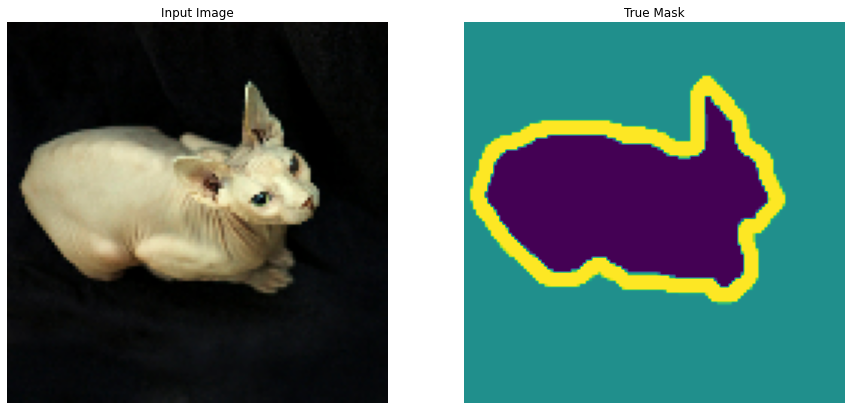

In [11]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

5. **모델을 정의합니다.**

이번 예제에서는 U-net 을 직접 구현하지 않고, 기존 모델의 구조를 활용하여 만들어볼 것입니다.

**`MobileNetV2`**의 일부 층을 활용하여 Downsampling 하고,<br/>
Keras가 제공하는 **`Pix2Pix`**를 활용하여 Upsampling 하도록 하겠습니다.

> ❗️ ***U-net을 직접 구현하는 Example은 Reference를 참조해주세요.***

In [12]:
OUTPUT_CHANNELS = 3

- **`MobileNetV2`**를 활용하여 Downsampling 부분을 만들어봅시다.

In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]


down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


- **`Pix2Pix`**를 활용하여 Upsampling 부분을 만들어봅시다.

In [14]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

U-net 형태의 모델을 함수로 정의합니다.<br/>
위에서 정의했던 Downsampling/Upsampling 부분을 불러온 뒤에 이미지 크기를 맞추어 주기 위해서 마지막 층을 추가합니다.

In [15]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling을 진행하는 부분입니다.
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling을 진행하는 부분입니다.
    for up, skip in zip(up_stack, skips):
        x = up(x)
        # Downsampling 결과를 Concatenate 해줍니다.
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [17]:
model = unet_model(OUTPUT_CHANNELS)

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

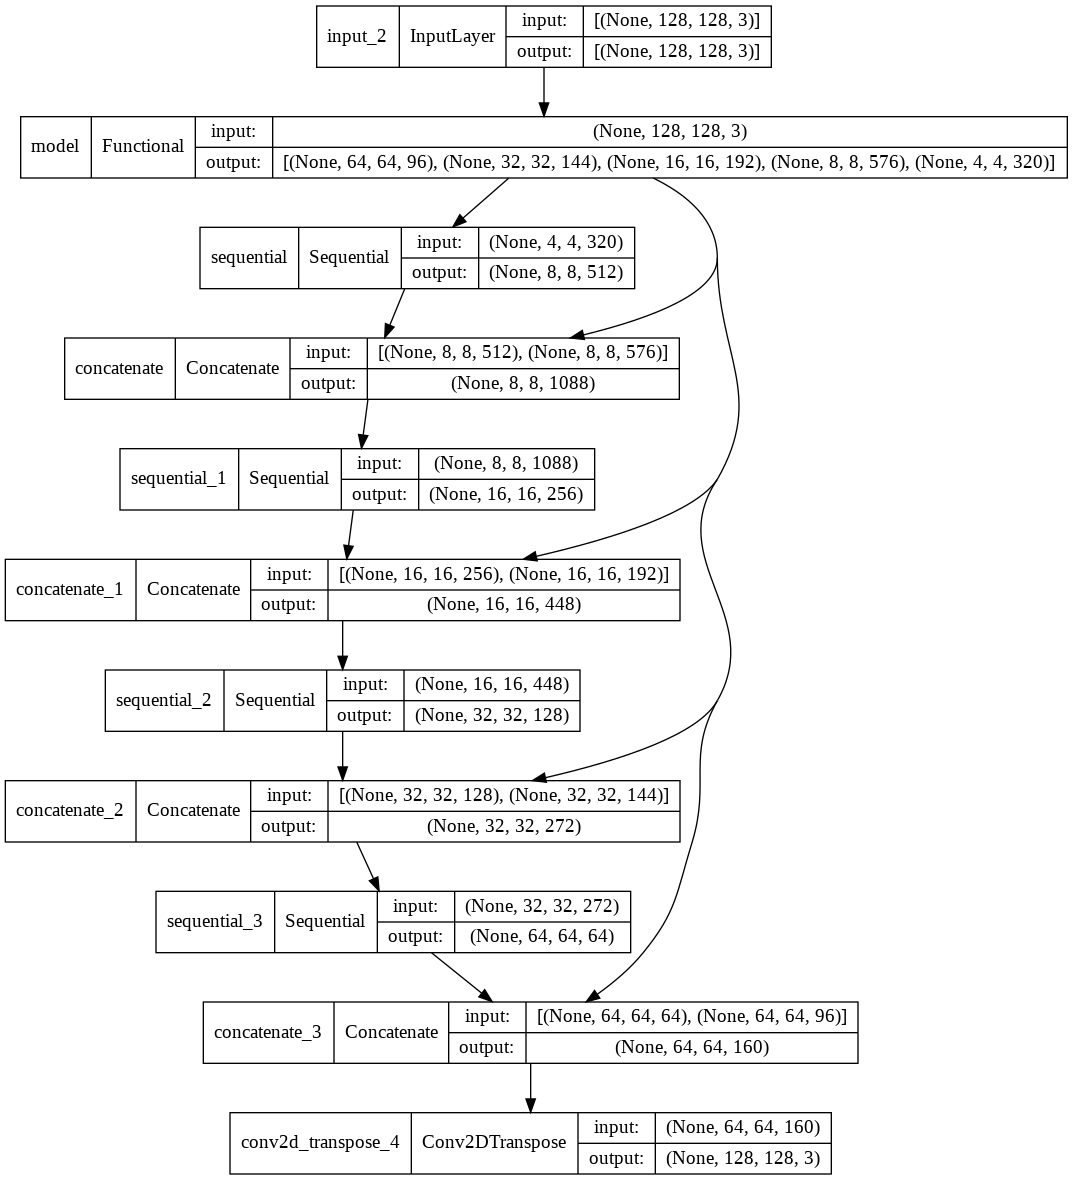

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

6. **모델의 예측을 보여주는 함수와 학습 중에 해당 함수를 동작할 수 있도록 Callback을 정의합니다.**

In [21]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [22]:
def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

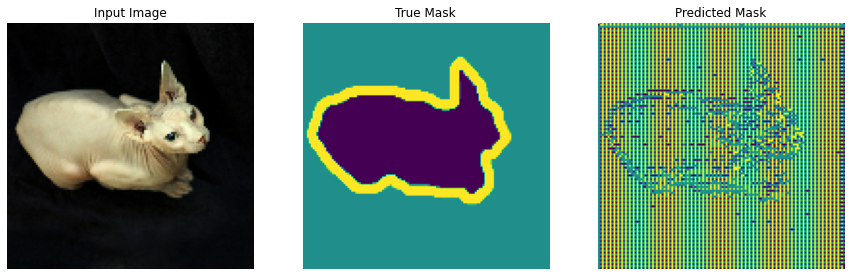

In [23]:
show_predictions()

In [24]:
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

7. **모델을 학습합니다.**

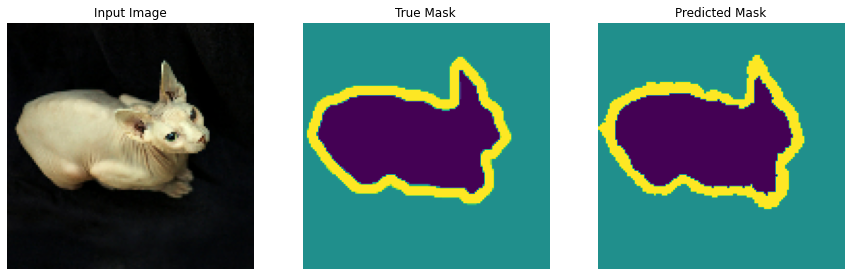


에포크 이후 예측 예시 20

57/57 [==============================] - 6s 98ms/step - loss: 0.1366 - accuracy: 0.9376 - val_loss: 0.3222 - val_accuracy: 0.8911


In [25]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

학습 곡선을 시각화합니다.

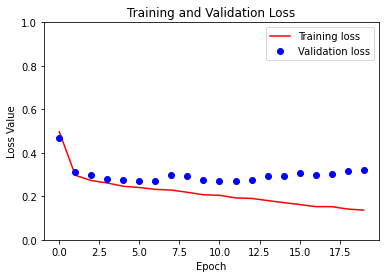

In [26]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

8. **학습 완료 후 시험(`test`) 데이터셋 내 특정 이미지에 대한 예측 결과를 시각화 해봅시다.**

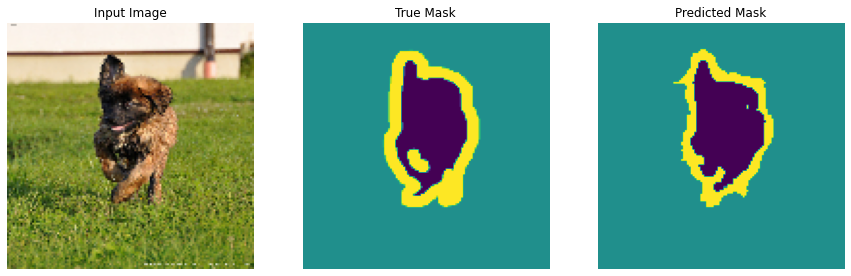

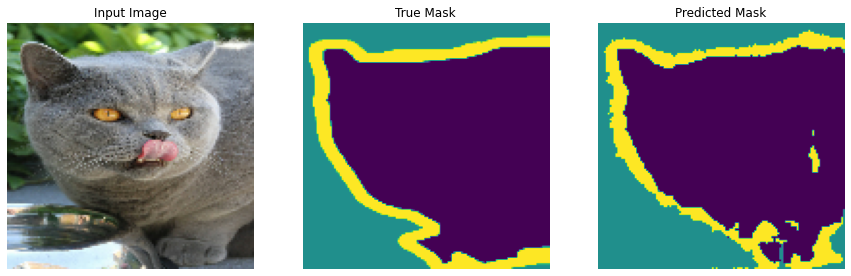

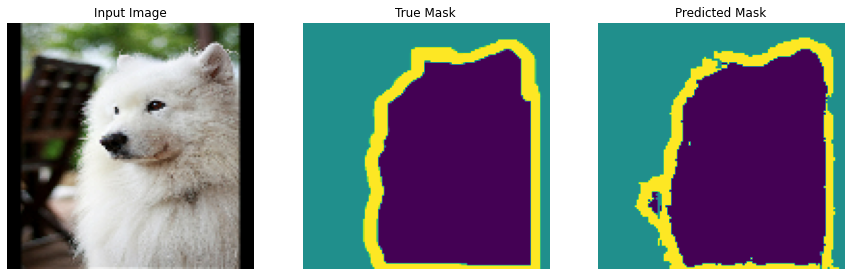

In [27]:
show_predictions(test_dataset, 3)

## 객체 탐지/인식(Object Detection/Recognition)

**<font color="ff6f61">객체 탐지/인식(Object Detection/Recognition)</font>**는 전체 이미지에서 레이블에 맞는 객체를 찾아내는 Task 입니다.<br/>
Segmentation 과 더불어 자율주행을 위한 주요 인공지능 기술로 사용되고 있습니다.<br/>
객체 탐지의 결과는 아래 이미지처럼 나타납니다.

<img src="https://i.imgur.com/NdIa8zj.jpg" height="500">

위처럼 객체의 경계에 **Bounding Box** 라고 하는 사각형 박스를 만든 후, 박스 내의 객체가 속하는 클래스가 무엇인지를 분류합니다.<br/>

### IoU(Intersection over Union)

그렇다면 객체 탐지의 결과는 어떻게 평가할까요?<br/>
객체 탐지를 평가하는 지표인 **<font color="ff6f61">IoU(Intersection over Union)</font>**에 대해 알아봅시다.

아래 왼쪽 그림의 초록색 박스처럼 정답에 해당하는 Bounding Box 를 Ground-truth 라고 합니다.<br/>
모델이 빨간색 박스처럼 예측했을 때 IoU 는 오른쪽 식을 사용하여 구할 수 있습니다.

<img src="https://i.imgur.com/6rn7Htg.png" height="300">
<img src="https://i.imgur.com/UkzrQU2.png" height="300">

IoU 를 사용하면 객체가 포함되어 있지만 너무 큰 범위를 잡는 문제를 해결할 수 있습니다.<br/>
아래는 Ground-truth/Prediction에 해당하는 Bounding Box 에 따라 IoU가 구해지는 예시를 나타내고 있습니다.

<img src="https://i.imgur.com/x9BAUY5.png" height="200">


### 대표적인 객체 탐지 Model

대표적인 객체 탐지 모델은 아래와 같이 발전하여 왔습니다.

<img src="https://i.imgur.com/fuC2OJA.png" height="350">

어떤 단계를 거쳐 분류(Classification)가 진행되는지에 따라 **2-stage** 방식과 **1-stage** 방식으로 나눌 수 있는데요.<br/>
본 Lecture Note 에서는 각 방식에 대해 간략하게만 알아보도록 하겠습니다.

> ❗️ ***각 모델에 대한 설명과 코드 예제는 Reference를 통해 학습하도록 합시다.***

#### Two Stage Detector 

**Two Stage Detector**는 일련의 알고리즘을 통해 객체가 있을 만한 곳을 추천받은(Region Proposal) 뒤에<br/>
추천받은 Region, 즉 **RoI(Region of Interest)**에 대해 분류를 수행하는 방식입니다.<br/>
그림으로는 아래와 같이 나타낼 수 있습니다.

<img src="https://i.imgur.com/7a0K8RE.png" width="800">

대표적인 2-stage 모델로는 **<font color="ff6f61">R-CNN계열</font>(R-CNN, Fast R-CNN, Faster R-CNN 등)**의 모델이 있습니다.

#### One Stage Detector

**One Stage Detector**는 특정 지역을 추천받지 않고 입력 이미지를 Grid 등의 같은 작은 공간으로 나눈 뒤 해당 공간을 탐색하며 분류를 수행하는 방식입니다.<br/>
그림으로는 아래와 같이 나타낼 수 있습니다.

<img src="https://i.imgur.com/nusJjSY.png" width="800">

대표적인 1-stage 모델로는 **<font color="ff6f61">SSD</font>(Single Shot multibox Detector)계열**과 **<font color="ff6f61">YOLO</font>(You Only Look Once)계열**의 모델이 있습니다.